# PhysioNet/Computing in Cardiology Challenge 2020
## Classification of 12-lead ECGs
### 3. Explore formatted dataset

# Setup Notebook

In [96]:
# Import 3rd party libraries
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import local Libraries
sys.path.insert(0, os.path.dirname(os.path.abspath(os.getcwd())))
from kardioml import DATA_PATH

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Data

In [138]:
# Set dataset
dataset = 'A'

# Get list of meta data files
filenames = [file.split('.')[0] for file in os.listdir(os.path.join(DATA_PATH, dataset, 'formatted')) if 'json' in file]

# List of meta data
meta_data_list = list()

# Open files and extract meta data
for filename in filenames:
    
    # Import meta data
    data = json.load(open(os.path.join(DATA_PATH, dataset, 'formatted', '{}.json'.format(filename))))
    meta_data_list.append(data)
    
# Generate DataFrame
meta_data = pd.DataFrame(meta_data_list)

# Set numeric
meta_data['age'] = meta_data['age'].apply(pd.to_numeric, errors='coerce')

# Add columns
meta_data['label_count'] = meta_data['labels'].map(lambda val: len(val))
meta_data['length'] = meta_data['shape'].map(lambda val: val[1] * 1 / FS)
meta_data['label_count'] = meta_data['labels'].map(lambda val: len(val))
meta_data['labels_concat'] = meta_data['labels_full'].map(lambda val: '{}\n{}'.format(val[0], val[1]) if len(val) == 2 else val[0])
    
# View DataFrame
meta_data.head()

,age,channel_order,filename,label_train,labels,labels_full,labels_int,sex,shape,label_count,length,labels_concat
0,74.0,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0001,"[0, 0, 0, 0, 0, 0, 1, 0, 0]",[RBBB],[Right bundle branch block],[6],Male,"[12, 7500]",1,15.000,Right bundle branch block
1,49.0,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0002,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",[Normal],[Normal sinus rhythm],[3],Female,"[12, 5000]",1,10.000,Normal sinus rhythm
2,81.0,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0003,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",[AF],[Atrial fibrillation],[0],Female,"[12, 5000]",1,10.000,Atrial fibrillation
3,45.0,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0004,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",[AF],[Atrial fibrillation],[0],Male,"[12, 5974]",1,11.948,Atrial fibrillation
4,53.0,"[I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5...",A0005,"[0, 0, 0, 0, 0, 1, 0, 0, 0]",[PVC],[Premature ventricular complex],[5],Male,"[12, 12500]",1,25.000,Premature ventricular complex


# Plot Distributions

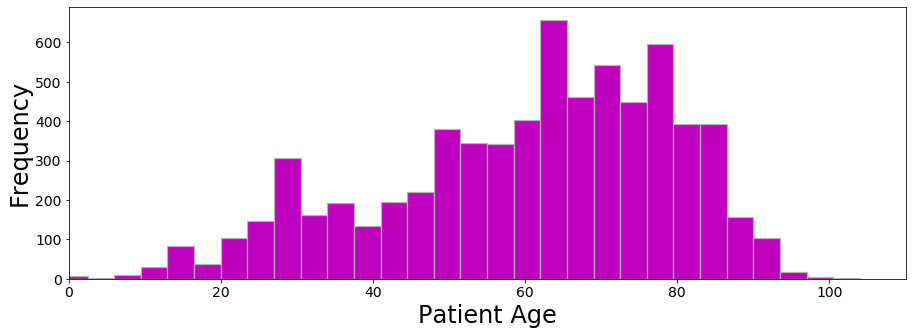

In [103]:
# Plot age distribution
fig = plt.figure(figsize=(15, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

ax.hist(meta_data['age'].values, bins=30, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

ax.set_xlabel('Patient Age', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([0, 110])

plt.show()

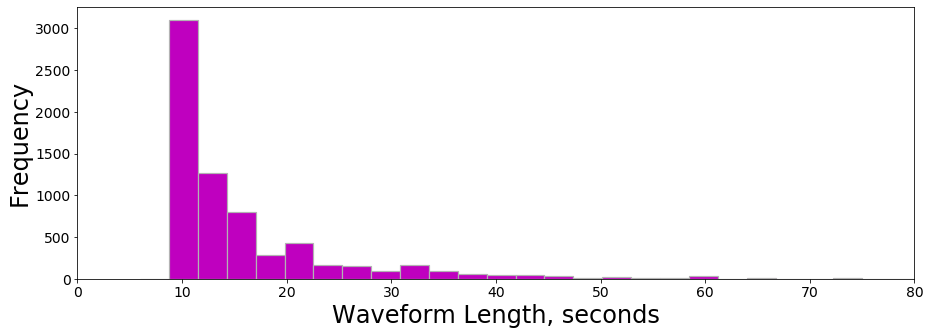

In [104]:
# Plot waveform length distribution
fig = plt.figure(figsize=(15, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

ax.hist(meta_data['length'].values, bins=50, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

ax.set_xlabel('Waveform Length, seconds', fontsize=24)
ax.set_ylabel('Frequency', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([0, 80])

plt.show()

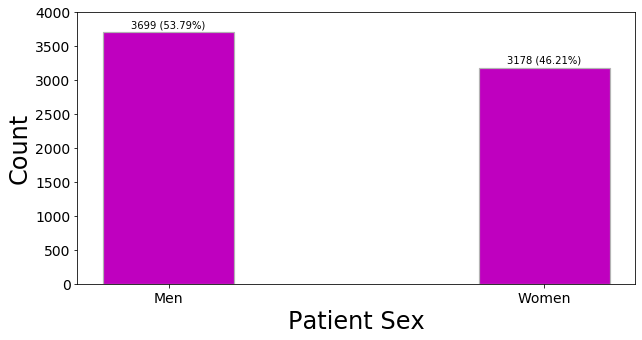

In [105]:
# Plot sex bar plot
labels = ['Men', 'Women']
sex_count = [meta_data['sex'][meta_data['sex'] == 'Male'].shape[0], meta_data['sex'][meta_data['sex'] == 'Female'].shape[0]]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(10, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, sex_count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({}%)'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Patient Sex', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim([0, 4000])
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

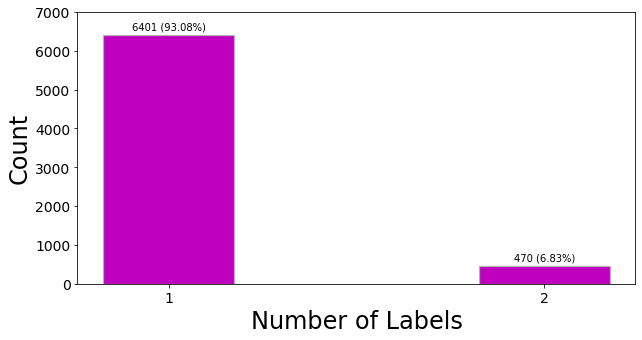

In [106]:
# Plot sex bar plot
labels = ['1', '2']
sex_count = [meta_data['label_count'][meta_data['label_count'] == 1].shape[0], 
             meta_data['label_count'][meta_data['label_count'] == 2].shape[0]]

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(10, 5), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, sex_count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} ({}%)'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Number of Labels', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim([0, 7000])
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

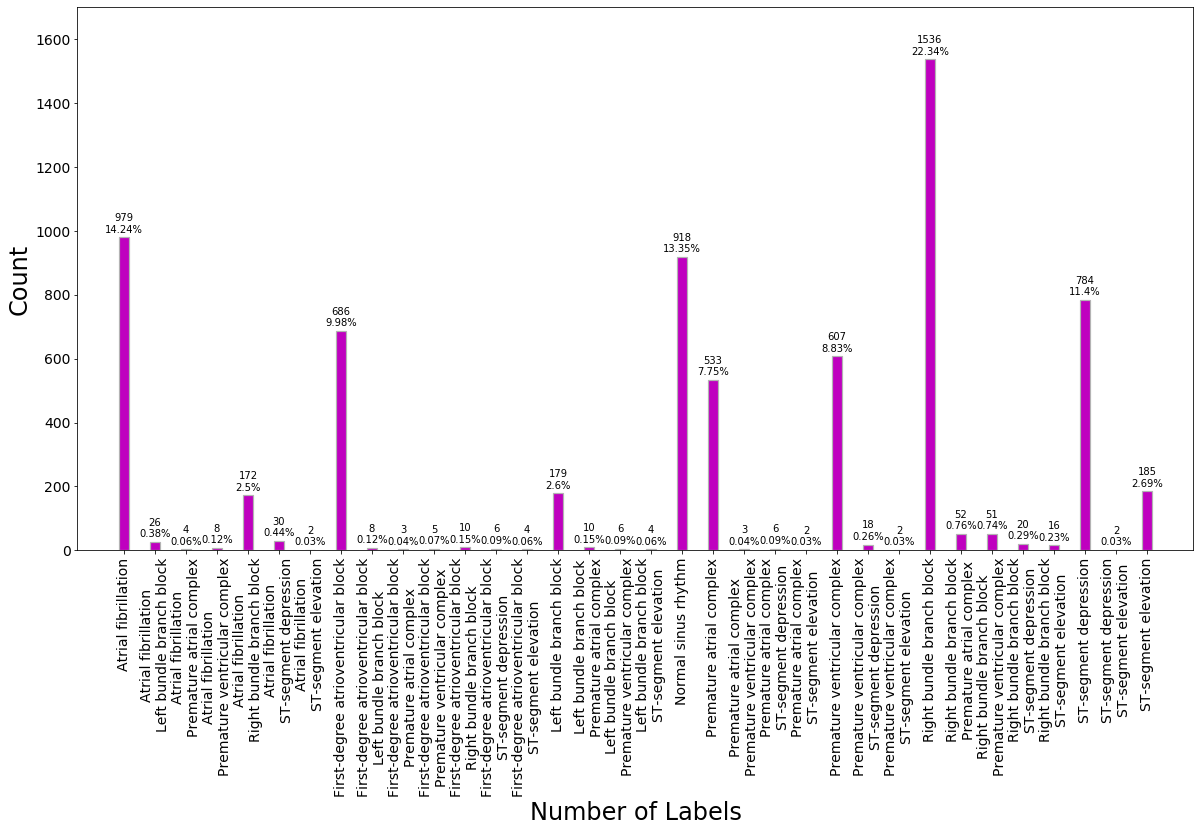

In [159]:
# Color list
colors = ['#E4FA42', '#FF9C44', '#2FA0AB', '#A233B5', '#AA3939', '#2E4172', '#958E49', '#04C304', '#00E5E5']

# List of Arrhythmias
arrhythmias = list(LABELS_LOOKUP.keys())

# Get list of labels
labels = [sorted(item['labels_full']) for item in meta_data_list]

# Plot sex bar plot
labels = meta_data.groupby('labels_concat')['filename'].nunique().index.tolist()
count = meta_data.groupby('labels_concat')['filename'].nunique().values.tolist()

x = np.arange(len(labels)) 
width = 0.35  

fig = plt.figure(figsize=(20, 10), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.subplot2grid((1, 1), (0, 0))

rects1 = ax.bar(x, count, width, facecolor='m', edgecolor=[0.7, 0.7, 0.7], linewidth=1.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}\n{}%'.format(height, np.round(height / meta_data.shape[0] * 100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

ax.set_xlabel('Number of Labels', fontsize=24)
ax.set_ylabel('Count', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim([-1.5, len(labels)+0.5])
ax.set_ylim([0, 1700])
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)

plt.show()